In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import seaborn as sns
from fbprophet import Prophet
import datetime

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
rcParams['figure.figsize'] = (16, 8)
rc('font', family='AppleGothic')

# Data Load

In [96]:
base_path = './open_data'
sub_path = './submission'

In [6]:
df = pd.read_csv(os.path.join(base_path, 'train.csv'), engine = 'python', encoding = 'cp949')
test = pd.read_csv(os.path.join(base_path, 'submission.csv'), engine = 'python', encoding = 'cp949')

# prophet

In [9]:
df2 = df[['DateTime','사용자']]
df2.columns = ['ds','y']

model = Prophet()
model.fit(df2)

## predict visualization

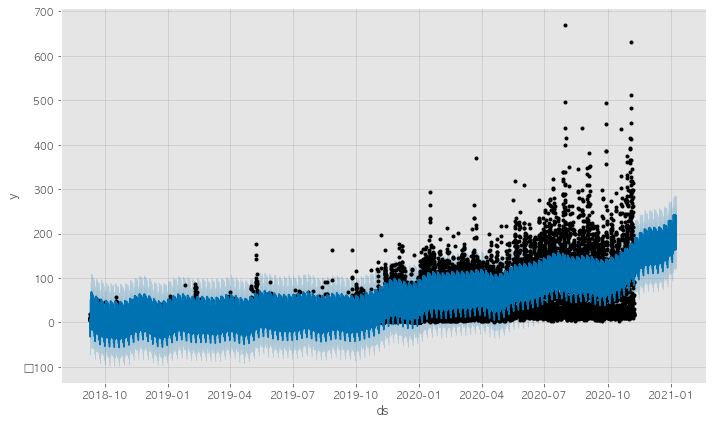

In [70]:
# 시간 단위 예측 -> 평균내서 제출해볼 것(오차보정도 해야함)
future = model.make_future_dataframe(periods = 1464, freq = 'H')
fcst = model.predict(future)
fig = model.plot(fcst)

In [ ]:
# 일단위 예측 -> 필요 없음
future = model.make_future_dataframe(periods = 61, freq = 'd')
fcst = model.predict(future)
fig = model.plot(fcst)

In [71]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-09 00:00:00,48.5222,-37.1336,45.1940,48.5222,48.5222,-42.5024,-42.5024,-42.5024,-2.6257,-2.6257,-2.6257,-16.4555,-16.4555,-16.4555,-23.4213,-23.4213,-23.4213,0.0,0.0,0.0,6.0197
1,2018-09-09 01:00:00,48.5144,-49.7031,34.3226,48.5144,48.5144,-55.8990,-55.8990,-55.8990,-15.8610,-15.8610,-15.8610,-16.5650,-16.5650,-16.5650,-23.4730,-23.4730,-23.4730,0.0,0.0,0.0,-7.3846
2,2018-09-09 02:00:00,48.5066,-54.7728,26.8765,48.5066,48.5066,-66.4936,-66.4936,-66.4936,-26.3549,-26.3549,-26.3549,-16.6138,-16.6138,-16.6138,-23.5248,-23.5248,-23.5248,0.0,0.0,0.0,-17.9870
3,2018-09-09 03:00:00,48.4988,-66.2154,15.2811,48.4988,48.4988,-73.4322,-73.4322,-73.4322,-33.2550,-33.2550,-33.2550,-16.6006,-16.6006,-16.6006,-23.5767,-23.5767,-23.5767,0.0,0.0,0.0,-24.9334
4,2018-09-09 04:00:00,48.4910,-72.5034,10.7798,48.4910,48.4910,-78.2059,-78.2059,-78.2059,-38.0532,-38.0532,-38.0532,-16.5241,-16.5241,-16.5241,-23.6286,-23.6286,-23.6286,0.0,0.0,0.0,-29.7149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20467,2021-01-08 19:00:00,198.5463,171.5304,255.0325,190.1202,205.9486,12.0319,12.0319,12.0319,8.8662,8.8662,8.8662,-1.1390,-1.1390,-1.1390,4.3047,4.3047,4.3047,0.0,0.0,0.0,210.5782
20468,2021-01-08 20:00:00,198.5713,167.2459,250.2243,190.1357,205.9800,10.6106,10.6106,10.6106,7.8696,7.8696,7.8696,-1.6090,-1.6090,-1.6090,4.3499,4.3499,4.3499,0.0,0.0,0.0,209.1819
20469,2021-01-08 21:00:00,198.5964,169.1368,254.6214,190.1512,206.0113,14.2015,14.2015,14.2015,11.9106,11.9106,11.9106,-2.1042,-2.1042,-2.1042,4.3950,4.3950,4.3950,0.0,0.0,0.0,212.7978
20470,2021-01-08 22:00:00,198.6214,172.4065,255.3763,190.1667,206.0427,15.8028,15.8028,15.8028,13.9866,13.9866,13.9866,-2.6238,-2.6238,-2.6238,4.4400,4.4400,4.4400,0.0,0.0,0.0,214.4242


In [81]:
# 예측한 데이터 접합
pred_df = fcst.iloc[19008:]
pred_df['DateTime'] = pred_df['ds'].apply(lambda x: datetime.datetime.strftime(x,'%Y-%m-%d'))

In [83]:
# 예측 결과
pred_df.groupby('DateTime')['yhat'].mean().reset_index(name = 'pred')

,DateTime,pred
0,2020-11-09,148.1302
1,2020-11-10,153.5559
2,2020-11-11,151.5274
3,2020-11-12,152.6928
4,2020-11-13,151.3858
...,...,...
56,2021-01-04,200.0620
57,2021-01-05,205.5121
58,2021-01-06,203.5000
59,2021-01-07,204.6718


# inference

In [103]:
submission_df = pd.DataFrame()
submission_df['DateTime'] = pd.date_range('2020-11-09','2021-01-08')
submission_df['DateTime'] = submission_df['DateTime'].apply(
            lambda x: datetime.datetime.strftime(x,'%Y-%m-%d')
        )

for col in df.columns[1:].tolist():
    df2 = df[['DateTime',col]]
    df2.columns = ['ds','y']

    model = Prophet()
    model.fit(df2)
    
    # 시간 단위 예측 -> 평균내서 제출해볼 것(오차보정도 해야함)
    future = model.make_future_dataframe(periods = 1464, freq = 'H')
    fcst = model.predict(future)
    print(f'{col} Forecasting....')
#     fig = model.plot(fcst) # 예측한 값 trendline
    
    # 예측해야하는 날짜
    pred_df = fcst.iloc[19008:]
    
    pred_df['DateTime'] = \
        pred_df['ds'].apply(
            lambda x: datetime.datetime.strftime(x,'%Y-%m-%d')
    )
    
    temp = pred_df.groupby('DateTime')['yhat'].sum().reset_index(name = col)
    
    submission_df = pd.merge(
        submission_df,
        temp,
        on = 'DateTime',
        how = 'left'
    )

사용자 Forecasting....
세션 Forecasting....
신규방문자 Forecasting....
페이지뷰 Forecasting....


In [104]:
submission_df

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3555.1253,3508.6185,885.6051,89673.6707
1,2020-11-10,3685.3425,3637.5930,931.4098,92481.2737
2,2020-11-11,3636.6572,3589.5170,907.5278,91023.0144
3,2020-11-12,3664.6263,3623.0635,913.6361,90986.3604
4,2020-11-13,3633.2590,3593.2335,905.4133,90612.3312
...,...,...,...,...,...
56,2021-01-04,4801.4887,4829.0414,1058.8951,132582.0396
57,2021-01-05,4932.2916,4958.1319,1098.7265,135420.5612
58,2021-01-06,4884.0007,4909.4363,1068.7140,134029.0991
59,2021-01-07,4912.1243,4941.5969,1068.6119,134089.2731


In [105]:
submission_df.to_csv(
    os.path.join(sub_path, 'submission_prophet_2020_12_21_00_53_00.csv'),
    index = False,
    encoding = 'cp949'
)